In [1]:
#importing required modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#getting data from saved files

In [4]:
f = open('phish_list.txt', 'r')
phish_list=[]
for x in f.readlines():
    phish_list.append(eval(x))
print(phish_list) 
f.close()

[[1, 1, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.06, 7, 0, 0, 0, 0, 14, 1, 13.0, 0, 0, 20, 33, 0, -1], [1, 1, 1, 1, 1, 1, 0, 1, -1, -1, 1, 1, 0, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 0, 1, 0.2, 8, 0, 0, 0, 0, 12, 2, 34.0, 0, 0, 22, 41, 0, -1], [1, 0, 1, 1, 1, -1, 0, -1, 1, -1, 1, 1, -1, -1, 0, 0, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.41, 15, 0, 0, 0, 0, 9, 1, 7.4, 7, 0, 19, 64, 2, -1], [1, 0, 1, 1, 1, -1, 0, -1, 1, -1, 1, 1, -1, -1, 0, 0, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.37, 13, 0, 0, 0, 0, 9, 1, 10.667, 8, 0, 18, 60, 2, -1], [1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 0, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 0.69, 13, 0, 0, 0, 0, 20, 1, 4.176, 0, 0, 23, 106, 0, -1], [1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 0, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 0.65, 12, 0, 0, 0, 0, 20, 1, 6.9, 0, 0, 23, 94, 0, -1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 0, -1, 0, 1, -1, -1, 1, -1, -1,

In [5]:
f = open('legit_list.txt', 'r')
legit_list=[]
for x in f.readlines():
    legit_list.append(eval(x))
print(legit_list) 
f.close()

[[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 0.04, 6, 0, 0, 0, 0, 7, 3, 19.0, 0, 0, 13, 24, 0, 1], [1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.04, 27, 2, 0, 1, 1, 8, 1, 7.308, 0, 0, 12, 166, 0, 1], [1, -1, 1, 1, 1, 1, 0, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 0.69, 18, 0, 0, 0, 0, 9, 2, 63.0, 0, 0, 15, 81, 0, 1], [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, -1, -1, 0, 0, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.04, 6, 0, 0, 0, 0, 7, 3, 22.0, 0, 0, 16, 27, 0, 1], [1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.44, 9, 0, 0, 0, 0, 6, 2, 31.0, 0, 0, 12, 39, 0, 1], [1, 0, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.67, 12, 0, 0, 0, 0, 10, 2, 56.0, 0, 0, 12, 67, 0, 1], [1, 1, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1,

In [6]:
#building pandas dataframe

In [7]:
feature_names=['haveIP', 'longURL', 'shortURL', 'symbol@', 'redirectSymbol',
       'prefix-Suffix', 'subDomains', 'protocol', 'domainRegLen', 'favicon',
       'nonStdPort', 'HTTPSDomainURL', 'requestURL', 'anchorURL',
       'linksInScriptTags', 'serverFormHandler', 'infoEmail', 'abnormalURL',
       'websiteForwarding', 'statusBarCust', 'disableRightClick',
       'usingPopupWindow', 'iFrameCheck', 'ageofDomain', 'DNSRecording',
       'pageRank', 'googleIndex', 'linksPointingToPage',
       'statsReport','ratioPath','countSpl','countSus','countCom','countQues','hasQuery','maxWordllength','minWordlength','lowerUpper','noDigits','noUpper','noLower','lengthURL','countHyp','class']

print(len(feature_names))

44


In [8]:
phish_df=pd.DataFrame(phish_list,columns=feature_names)
phish_df.head()

,haveIP,longURL,shortURL,symbol@,redirectSymbol,prefix-Suffix,subDomains,protocol,domainRegLen,favicon,...,hasQuery,maxWordllength,minWordlength,lowerUpper,noDigits,noUpper,noLower,lengthURL,countHyp,class
0,1,1,1,1,1,1,0,1,1,-1,...,0,14,1,13.000,0,0,20,33,0,-1
1,1,1,1,1,1,1,0,1,-1,-1,...,0,12,2,34.000,0,0,22,41,0,-1
2,1,0,1,1,1,-1,0,-1,1,-1,...,0,9,1,7.400,7,0,19,64,2,-1
3,1,0,1,1,1,-1,0,-1,1,-1,...,0,9,1,10.667,8,0,18,60,2,-1
4,1,-1,1,1,1,1,1,1,1,-1,...,0,20,1,4.176,0,0,23,106,0,-1


In [9]:
legit_df=pd.DataFrame(legit_list,columns=feature_names)
legit_df.head()

,haveIP,longURL,shortURL,symbol@,redirectSymbol,prefix-Suffix,subDomains,protocol,domainRegLen,favicon,...,hasQuery,maxWordllength,minWordlength,lowerUpper,noDigits,noUpper,noLower,lengthURL,countHyp,class
0,1,1,1,1,1,1,0,1,1,1,...,0,7,3,19.000,0,0,13,24,0,1
1,1,-1,1,1,1,1,-1,1,1,-1,...,1,8,1,7.308,0,0,12,166,0,1
2,1,-1,1,1,1,1,0,-1,1,-1,...,0,9,2,63.000,0,0,15,81,0,1
3,1,1,1,1,1,1,0,1,1,1,...,0,7,3,22.000,0,0,16,27,0,1
4,1,1,1,1,1,1,-1,1,1,-1,...,0,6,2,31.000,0,0,12,39,0,1


In [10]:
train_df=pd.concat([legit_df,phish_df])
train_df.head()

,haveIP,longURL,shortURL,symbol@,redirectSymbol,prefix-Suffix,subDomains,protocol,domainRegLen,favicon,...,hasQuery,maxWordllength,minWordlength,lowerUpper,noDigits,noUpper,noLower,lengthURL,countHyp,class
0,1,1,1,1,1,1,0,1,1,1,...,0,7,3,19.000,0,0,13,24,0,1
1,1,-1,1,1,1,1,-1,1,1,-1,...,1,8,1,7.308,0,0,12,166,0,1
2,1,-1,1,1,1,1,0,-1,1,-1,...,0,9,2,63.000,0,0,15,81,0,1
3,1,1,1,1,1,1,0,1,1,1,...,0,7,3,22.000,0,0,16,27,0,1
4,1,1,1,1,1,1,-1,1,1,-1,...,0,6,2,31.000,0,0,12,39,0,1


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 499
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   haveIP               737 non-null    int64  
 1   longURL              737 non-null    int64  
 2   shortURL             737 non-null    int64  
 3   symbol@              737 non-null    int64  
 4   redirectSymbol       737 non-null    int64  
 5   prefix-Suffix        737 non-null    int64  
 6   subDomains           737 non-null    int64  
 7   protocol             737 non-null    int64  
 8   domainRegLen         737 non-null    int64  
 9   favicon              737 non-null    int64  
 10  nonStdPort           737 non-null    int64  
 11  HTTPSDomainURL       737 non-null    int64  
 12  requestURL           737 non-null    int64  
 13  anchorURL            737 non-null    int64  
 14  linksInScriptTags    737 non-null    int64  
 15  serverFormHandler    737 non-null    int

In [12]:
train_df.isnull().sum()

haveIP                 0
longURL                0
shortURL               0
symbol@                0
redirectSymbol         0
prefix-Suffix          0
subDomains             0
protocol               0
domainRegLen           0
favicon                0
nonStdPort             0
HTTPSDomainURL         0
requestURL             0
anchorURL              0
linksInScriptTags      0
serverFormHandler      0
infoEmail              0
abnormalURL            0
websiteForwarding      0
statusBarCust          0
disableRightClick      0
usingPopupWindow       0
iFrameCheck            0
ageofDomain            0
DNSRecording           0
pageRank               0
googleIndex            0
linksPointingToPage    0
statsReport            0
ratioPath              0
countSpl               0
countSus               0
countCom               0
countQues              0
hasQuery               0
maxWordllength         0
minWordlength          0
lowerUpper             0
noDigits               0
noUpper                0


In [13]:
#Splitting the dataset

In [14]:
x = train_df.drop(["class"],axis =1)
y = train_df["class"]

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((589, 43), (589,), (148, 43), (148,))

In [16]:
model_name = []
accuracy = []
f1_score = []
recall = []
precision = []


def storeResults(model, a, b, c, d):
    model_name.append(model)
    accuracy.append(round(a, 3))
    f1_score.append(round(b, 3))
    recall.append(round(c, 3))
    precision.append(round(d, 3))

In [17]:
#Training the models using various ML algorithms

In [18]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [19]:
y_train_log = log.predict(x_train)
y_test_log = log.predict(x_test)


acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.966
Logistic Regression : Accuracy on test Data: 0.959

Logistic Regression : f1_score on training Data: 0.947
Logistic Regression : f1_score on test Data: 0.939

Logistic Regression : Recall on training Data: 0.952
Logistic Regression : Recall on test Data: 0.920

Logistic Regression : precision on training Data: 0.942
Logistic Regression : precision on test Data: 0.958


In [20]:
y_pred_lr=log.predict(x_test)
print(log)
print(metrics.classification_report(y_test,y_pred_lr))

LogisticRegression()
              precision    recall  f1-score   support

          -1       0.96      0.98      0.97        98
           1       0.96      0.92      0.94        50

    accuracy                           0.96       148
   macro avg       0.96      0.95      0.95       148
weighted avg       0.96      0.96      0.96       148



In [21]:
storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
y_train_knn = knn.predict(x_train)
y_test_knn = knn.predict(x_test)

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 1.000
K-Nearest Neighbors : Accuracy on test Data: 0.932

K-Nearest Neighbors : f1_score on training Data: 1.000
K-Nearest Neighbors : f1_score on test Data: 0.898

K-Nearest Neighborsn : Recall on training Data: 1.000
Logistic Regression : Recall on test Data: 0.880

K-Nearest Neighbors : precision on training Data: 1.000
K-Nearest Neighbors : precision on test Data: 0.917


In [24]:
y_pred_knn=knn.predict(x_test)

print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

          -1       0.94      0.96      0.95        98
           1       0.92      0.88      0.90        50

    accuracy                           0.93       148
   macro avg       0.93      0.92      0.92       148
weighted avg       0.93      0.93      0.93       148



In [25]:
storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)
svc.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [27]:
y_train_svc = svc.predict(x_train)
y_test_svc = svc.predict(x_test)

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.973
Support Vector Machine : Accuracy on test Data: 0.959

Support Vector Machine : f1_score on training Data: 0.957
Support Vector Machine : f1_score on test Data: 0.940

Support Vector Machine : Recall on training Data: 0.963
Support Vector Machine : Recall on test Data: 0.940

Support Vector Machine : precision on training Data: 0.952
Support Vector Machine : precision on test Data: 0.940


In [28]:
y_pred_svm=svc.predict(x_test)

print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          -1       0.97      0.97      0.97        98
           1       0.94      0.94      0.94        50

    accuracy                           0.96       148
   macro avg       0.95      0.95      0.95       148
weighted avg       0.96      0.96      0.96       148



In [29]:
storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

nb=  GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [31]:
y_train_nb = nb.predict(x_train)
y_test_nb = nb.predict(x_test)

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.900
Naive Bayes Classifier : Accuracy on test Data: 0.899

Naive Bayes Classifier : f1_score on training Data: 0.858
Naive Bayes Classifier : f1_score on test Data: 0.854

Naive Bayes Classifier : Recall on training Data: 0.952
Naive Bayes Classifier : Recall on test Data: 0.880

Naive Bayes Classifier : precision on training Data: 0.781
Naive Bayes Classifier : precision on test Data: 0.830


In [32]:
y_pred_nb=nb.predict(x_test)

print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

          -1       0.94      0.91      0.92        98
           1       0.83      0.88      0.85        50

    accuracy                           0.90       148
   macro avg       0.88      0.89      0.89       148
weighted avg       0.90      0.90      0.90       148



In [33]:
storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=30)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [35]:
y_train_tree = tree.predict(x_train)
y_test_tree = tree.predict(x_test)

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.946

Decision Tree : f1_score on training Data: 1.000
Decision Tree : f1_score on test Data: 0.922

Decision Tree : Recall on training Data: 1.000
Decision Tree : Recall on test Data: 0.940

Decision Tree : precision on training Data: 1.000
Decision Tree : precision on test Data: 0.904


In [36]:
y_pred_tree=tree.predict(x_test)

print(metrics.classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

          -1       0.97      0.95      0.96        98
           1       0.90      0.94      0.92        50

    accuracy                           0.95       148
   macro avg       0.94      0.94      0.94       148
weighted avg       0.95      0.95      0.95       148



In [37]:
storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [39]:
y_train_forest = forest.predict(x_train)
y_test_forest = forest.predict(x_test)

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.998
Random Forest : Accuracy on test Data: 0.953

Random Forest : f1_score on training Data: 0.997
Random Forest : f1_score on test Data: 0.928

Random Forest : Recall on training Data: 0.995
Random Forest : Recall on test Data: 0.900

Random Forest : precision on training Data: 1.000
Random Forest : precision on test Data: 0.904


In [40]:
y_pred_forest=forest.predict(x_test)

print(metrics.classification_report(y_test, y_pred_forest))

              precision    recall  f1-score   support

          -1       0.95      0.98      0.96        98
           1       0.96      0.90      0.93        50

    accuracy                           0.95       148
   macro avg       0.95      0.94      0.95       148
weighted avg       0.95      0.95      0.95       148



In [41]:
storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [43]:
y_train_gbc = gbc.predict(x_train)
y_test_gbc = gbc.predict(x_test)

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 1.000
Gradient Boosting Classifier : Accuracy on test Data: 0.973

Gradient Boosting Classifier : f1_score on training Data: 1.000
Gradient Boosting Classifier : f1_score on test Data: 0.961

Gradient Boosting Classifier : Recall on training Data: 1.000
Gradient Boosting Classifier : Recall on test Data: 0.980

Gradient Boosting Classifier : precision on training Data: 1.000
Gradient Boosting Classifier : precision on test Data: 0.942


In [44]:
y_pred_gbc=gbc.predict(x_test)

print(metrics.classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

          -1       0.99      0.97      0.98        98
           1       0.94      0.98      0.96        50

    accuracy                           0.97       148
   macro avg       0.97      0.97      0.97       148
weighted avg       0.97      0.97      0.97       148



In [45]:
storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(x_train,y_train)

MLPClassifier()

In [47]:
y_train_mlp = mlp.predict(x_train)
y_test_mlp = mlp.predict(x_test)

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.973
Multi-layer Perceptron : Accuracy on test Data: 0.946

Multi-layer Perceptron : f1_score on training Data: 0.957
Multi-layer Perceptron : f1_score on test Data: 0.957

Multi-layer Perceptron : Recall on training Data: 0.952
Multi-layer Perceptron : Recall on test Data: 0.900

Multi-layer Perceptron : precision on training Data: 0.962
Multi-layer Perceptron : precision on test Data: 0.938


In [48]:
y_pred_mlp=mlp.predict(x_test)

print(metrics.classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

          -1       0.95      0.97      0.96        98
           1       0.94      0.90      0.92        50

    accuracy                           0.95       148
   macro avg       0.94      0.93      0.94       148
weighted avg       0.95      0.95      0.95       148



In [49]:
storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

In [50]:
#Comparing the models

In [51]:
results = pd.DataFrame({ 'Model Name' : model_name,
                        'Accuracy' : accuracy,
                        'F1_Score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [52]:
results

,Model Name,Accuracy,F1_Score,Recall,Precision
0,Logistic Regression,0.959,0.939,0.952,0.942
1,K-Nearest Neighbors,0.932,0.898,1.000,1.000
2,Support Vector Machine,0.959,0.940,0.963,0.952
3,Naive Bayes Classifier,0.899,0.854,0.952,0.781
4,Decision Tree,0.946,0.922,1.000,1.000
5,Random Forest,0.953,0.928,0.995,1.000
6,Gradient Boosting Classifier,0.973,0.961,1.000,1.000
7,Multi-layer Perceptron,0.946,0.918,0.952,0.962


In [53]:
sorted_results=results.sort_values(by=['Accuracy', 'F1_Score'],ascending=False).reset_index(drop=True)

In [55]:
sorted_results

,Model Name,Accuracy,F1_Score,Recall,Precision
0,Gradient Boosting Classifier,0.973,0.961,1.000,1.000
1,Support Vector Machine,0.959,0.940,0.963,0.952
2,Logistic Regression,0.959,0.939,0.952,0.942
3,Random Forest,0.953,0.928,0.995,1.000
4,Decision Tree,0.946,0.922,1.000,1.000
5,Multi-layer Perceptron,0.946,0.918,0.952,0.962
6,K-Nearest Neighbors,0.932,0.898,1.000,1.000
7,Naive Bayes Classifier,0.899,0.854,0.952,0.781


In [56]:
#Plotting the ROC Curve

In [57]:
y_probs = gbc.predict_proba(x_test)[:, 1]

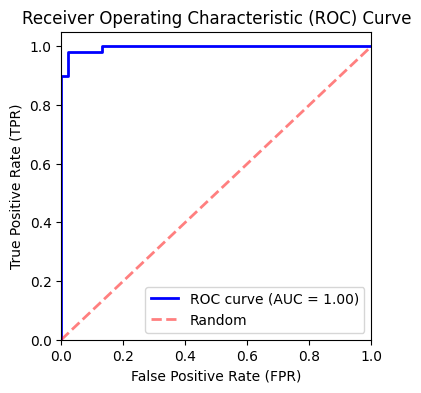

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [59]:
#Testing the model with unseen URLS

In [63]:
from custom.feature import FeatureExtraction

test_list=[]
testurls=['https://onlinecourses.nptel.ac.in/noc22_md01/preview','https://openphish.com/phishing_feeds.html','https://www.geeksforgeeks.org/python-program-convert-string-list/','https://srkrec.edu.in/','https://skillbox.surgeclasses.com/home','https://kavach.mic.gov.in/']
for url in testurls:
    pt=FeatureExtraction(url)
    temp=pt.getFeaturesList()
    test_list.append(temp)
    print(url,temp)

test_features=feature_names[:len(feature_names)-1]

test_df=pd.DataFrame(test_list,columns=test_features)
test_df.head()

https://onlinecourses.nptel.ac.in/noc22_md01/preview [1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.37, 9, 0, 0, 0, 0, 13, 2, 40.0, 0, 0, 22, 52, 0]
https://openphish.com/phishing_feeds.html [1, 1, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.49, 7, 0, 0, 0, 0, 9, 3, 35.0, 0, 0, 12, 41, 0]
https://www.geeksforgeeks.org/python-program-convert-string-list/ [1, 0, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.55, 11, 0, 0, 0, 0, 13, 3, 55.0, 0, 0, 19, 65, 0]
https://srkrec.edu.in/ [1, 1, 1, 1, 1, 1, 0, 1, 1, -1, 1, 1, -1, -1, 0, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 0.05, 6, 0, 0, 0, 0, 6, 2, 17.0, 0, 0, 11, 22, 0]
https://skillbox.surgeclasses.com/home [1, 1, 1, 1, 1, 1, 0, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 0.13, 6, 0, 0, 0, 0, 12, 3, 33.0, 0, 0, 23, 38, 0]
https://kavach.mic.gov.in/ [

,haveIP,longURL,shortURL,symbol@,redirectSymbol,prefix-Suffix,subDomains,protocol,domainRegLen,favicon,...,countQues,hasQuery,maxWordllength,minWordlength,lowerUpper,noDigits,noUpper,noLower,lengthURL,countHyp
0,1,1,1,1,1,1,-1,1,1,-1,...,0,0,13,2,40.0,0,0,22,52,0
1,1,1,1,1,1,1,0,1,1,-1,...,0,0,9,3,35.0,0,0,12,41,0
2,1,0,1,1,1,1,0,1,1,-1,...,0,0,13,3,55.0,0,0,19,65,0
3,1,1,1,1,1,1,0,1,1,-1,...,0,0,6,2,17.0,0,0,11,22,0
4,1,1,1,1,1,1,0,-1,1,-1,...,0,0,12,3,33.0,0,0,23,38,0


In [64]:
model_list=[log,tree,forest,gbc,mlp,svc,knn,nb]

for model in model_list:
    pred=model.predict(test_df)
    print(model)
    print(pred,(np.count_nonzero(pred == 1)/len(pred))*100)

LogisticRegression()
[ 1  1  1  1 -1  1] 83.33333333333334
DecisionTreeClassifier(max_depth=30)
[-1  1  1  1  1  1] 83.33333333333334
RandomForestClassifier(n_estimators=10)
[ 1  1  1  1 -1  1] 83.33333333333334
GradientBoostingClassifier(learning_rate=0.7, max_depth=4)
[1 1 1 1 1 1] 100.0
MLPClassifier()
[ 1  1 -1  1 -1  1] 66.66666666666666
GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})
[ 1  1  1  1 -1  1] 83.33333333333334
KNeighborsClassifier(n_neighbors=1)
[-1 -1 -1  1 -1  1] 33.33333333333333
GaussianNB()
[ 1  1  1  1 -1  1] 83.33333333333334


In [76]:
fl=open(r'testfeed.txt','r')
tempurls=fl.readlines()
print(tempurls)

['https://3659dd.net/\n', 'https://www--wellsfargo--com--4y49329d48d6c.wsipv6.com/\n', 'https://metamazk-log-usa.godaddysites.com/\n', 'https://mateimsklogi.godaddysites.com/\n', 'https://login.microsoftoline.larga-me.com/\n', 'https://www--wellsfargo--com--r149329d48d6c.wsipv6.com/\n', 'https://kraken-logines.godaddysites.com/\n', 'https://www--wellsfargo--com--bv49329d48d6c.wsipv6.com/\n', 'https://www--wellsfargo--com--by49329d48d6c.wsipv6.com/\n', 'https://ttyp.io/\n', 'https://smartcase.ltda/lD7krbUW7K7kU5/?id\n', 'https://halosdfb.alphagg9.cyou.burasa.live/\n', 'https://fndme.cloud/expire/\n', 'http://shimmer-phase-sunscreen.glitch.me/\n', 'https://3r2-i.cloud/expire/\n', 'http://aelssunu4wc100293894752321.work.gd/\n', 'http://krakkennnlogix.godaddysites.com/\n', 'http://muitymesklogiz.godaddysites.com/\n', 'https://cashappuk.top/\n', 'https://www--wellsfargo--com--uw49329d48d6c.wsipv6.com/\n', 'https://optusnet-com.blogspot.com/\n', 'http://upollognn.mystrikingly.com/\n', 'http:

In [77]:
for i in range(len(tempurls)):
    k=len(tempurls[i])
    tempurls[i]=tempurls[i][:k-1]
print(tempurls)

['https://3659dd.net/', 'https://www--wellsfargo--com--4y49329d48d6c.wsipv6.com/', 'https://metamazk-log-usa.godaddysites.com/', 'https://mateimsklogi.godaddysites.com/', 'https://login.microsoftoline.larga-me.com/', 'https://www--wellsfargo--com--r149329d48d6c.wsipv6.com/', 'https://kraken-logines.godaddysites.com/', 'https://www--wellsfargo--com--bv49329d48d6c.wsipv6.com/', 'https://www--wellsfargo--com--by49329d48d6c.wsipv6.com/', 'https://ttyp.io/', 'https://smartcase.ltda/lD7krbUW7K7kU5/?id', 'https://halosdfb.alphagg9.cyou.burasa.live/', 'https://fndme.cloud/expire/', 'http://shimmer-phase-sunscreen.glitch.me/', 'https://3r2-i.cloud/expire/', 'http://aelssunu4wc100293894752321.work.gd/', 'http://krakkennnlogix.godaddysites.com/', 'http://muitymesklogiz.godaddysites.com/', 'https://cashappuk.top/', 'https://www--wellsfargo--com--uw49329d48d6c.wsipv6.com/', 'https://optusnet-com.blogspot.com/', 'http://upollognn.mystrikingly.com/', 'http://optusnet-com.blogspot.com.ee/', 'https://m

In [87]:
from custom.feature import FeatureExtraction

test_list=[]

for url in tempurls[111:120]:
    pt=FeatureExtraction(url)
    temp=pt.getFeaturesList()
    test_list.append(temp)
    print(url,temp)


test_df2=pd.DataFrame(test_list,columns=test_features)
test_df2.head()

http://upholdwelogin.mystrikingly.com/ [1, 1, 1, 1, 1, 1, 0, -1, 1, -1, 1, 1, 0, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 0.03, 6, 0, 0, 0, 0, 13, 3, 33.0, 0, 0, 28, 38, 0]
http://m.3656.at/ [1, 1, 1, 1, 1, 1, 0, -1, -1, -1, 1, 1, 0, -1, 1, 1, -1, -1, 0, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 0.06, 6, 0, 0, 0, 0, 4, 1, 8.0, 4, 0, 3, 17, 0]
http://metanmasklogin.mystrikingly.com/ [1, 1, 1, 1, 1, 1, 0, -1, 1, -1, 1, 1, 0, -1, 0, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 0.03, 6, 0, 0, 0, 0, 14, 3, 34.0, 0, 0, 29, 39, 0]
https://www--wellsfargo--com--wr49329d48d6c.wsipv6.com/ [1, 0, 1, 1, 1, -1, 0, 1, 1, -1, 1, 1, -1, -1, 1, 0, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, 0.02, 12, 0, 0, 0, 0, 10, 1, 35.0, 9, 0, 29, 55, 6]
Error trying to connect to socket: closing socket - [Errno 11001] getaddrinfo failed
https://bankofus.blogspot.sg/ [1, 1, 1, 1, 1, 1, 0, 1, -1, -1, 1, 1, 0, -1, 1, 0, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 0.03, 6, 0, 0, 0, 0, 8, 2, 24.0, 0, 0

,haveIP,longURL,shortURL,symbol@,redirectSymbol,prefix-Suffix,subDomains,protocol,domainRegLen,favicon,...,countQues,hasQuery,maxWordllength,minWordlength,lowerUpper,noDigits,noUpper,noLower,lengthURL,countHyp
0,1,1,1,1,1,1,0,-1,1,-1,...,0,0,13,3,33.0,0,0,28,38,0
1,1,1,1,1,1,1,0,-1,-1,-1,...,0,0,4,1,8.0,4,0,3,17,0
2,1,1,1,1,1,1,0,-1,1,-1,...,0,0,14,3,34.0,0,0,29,39,0
3,1,0,1,1,1,-1,0,1,1,-1,...,0,0,10,1,35.0,9,0,29,55,6
4,1,1,1,1,1,1,0,1,-1,-1,...,0,0,8,2,24.0,0,0,18,29,0


In [88]:
model_list=[log,tree,forest,gbc,mlp,svc,knn,nb]

for model in model_list:
    pred=model.predict(test_df2)
    print(model)
    print(pred,(np.count_nonzero(pred == -1)/len(pred))*100)

LogisticRegression()
[-1 -1 -1 -1 -1 -1 -1 -1 -1] 100.0
DecisionTreeClassifier(max_depth=30)
[-1  1 -1 -1  1 -1 -1 -1 -1] 77.77777777777779
RandomForestClassifier(n_estimators=10)
[-1 -1 -1 -1 -1 -1 -1 -1 -1] 100.0
GradientBoostingClassifier(learning_rate=0.7, max_depth=4)
[ 1 -1  1 -1  1 -1 -1 -1 -1] 66.66666666666666
MLPClassifier()
[-1 -1 -1 -1 -1 -1 -1 -1 -1] 100.0
GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})
[-1 -1 -1 -1 -1 -1 -1 -1 -1] 100.0
KNeighborsClassifier(n_neighbors=1)
[-1 -1 -1 -1 -1 -1 -1 -1 -1] 100.0
GaussianNB()
[-1 -1 -1 -1  1 -1 -1 -1 -1] 88.88888888888889


In [89]:
#Saving the model

In [62]:
import joblib

joblib.dump(log,'finalmodel.joblib')

['finalmodel.joblib']